<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practiced them yet). In this lesson we'll discuss a fundamental method for avoiding overfitting that is commonly referred to as _train/test split_ validation. 

The idea is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Working with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [146]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [4]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column
boston = pd.concat([X, y], axis=1)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [16]:
boston.index

RangeIndex(start=0, stop=506, step=1)

In [23]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [25]:
boston.shape

(506, 14)

In [28]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [29]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


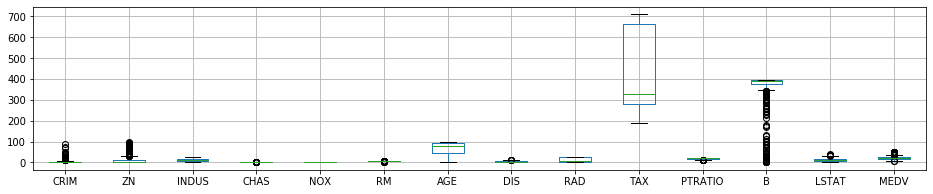

In [50]:
boston.boxplot(figsize=(16, 3));

In [31]:
boston.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

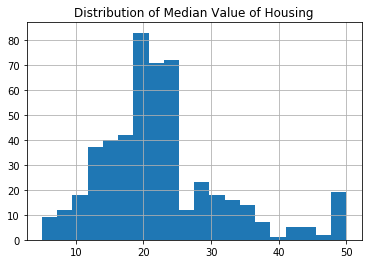

In [46]:
ax = boston['MEDV'].hist(bins=20)
ax.set_title('Distribution of Median Value of Housing');

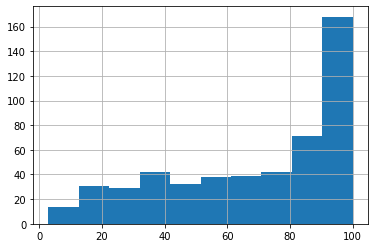

In [32]:
boston.AGE.hist();

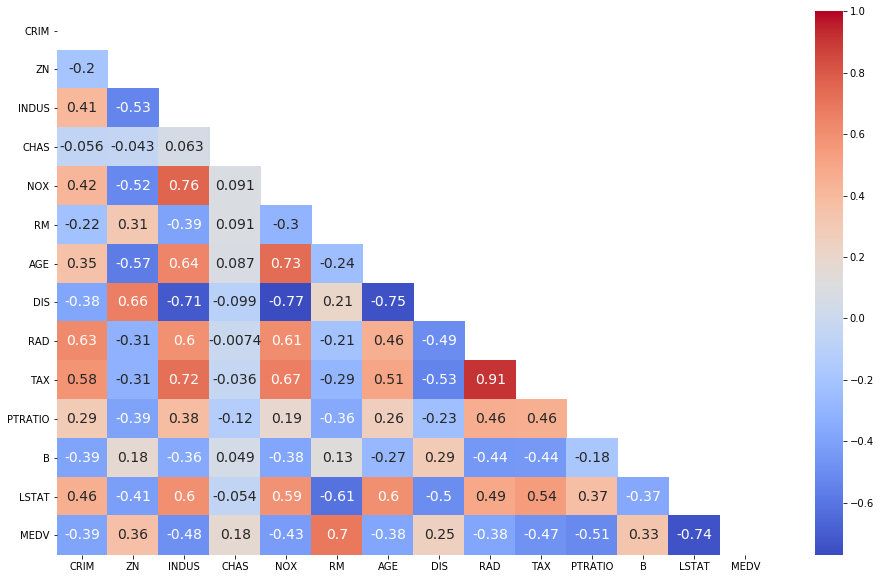

In [35]:
mask = np.zeros_like(boston.corr());
triangle_indices = np.triu_indices_from(mask);
mask[triangle_indices]= True
plt.figure(figsize=(16, 10));
sns.heatmap(boston.corr(), mask=mask, annot=True, cmap='coolwarm', annot_kws={'size': 14});

## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [76]:
#pick RM, PTRATIO, LSTAT, INDUS four features since they showed largest absolute correlation coefficients with MEDV
# create feature matrix (X)
feature_cols = boston.columns.drop(['MEDV','CRIM','ZN','CHAS','NOX','AGE','DIS','RAD','TAX','B'])
X = boston[feature_cols]
print(X.head())
# create response vector (y)
y = boston.MEDV

   INDUS     RM  PTRATIO  LSTAT
0   2.31  6.575     15.3   4.98
1   7.07  6.421     17.8   9.14
2   7.07  7.185     17.8   4.03
3   2.18  6.998     18.7   2.94
4   2.18  7.147     18.7   5.33


In [77]:
from sklearn.linear_model import LinearRegression
# Instantiate the model
lr = LinearRegression()
print(type(lr))
# help(lr)
# fit using the 4 features of our data
lr.fit(X, y)

<class 'sklearn.linear_model._base.LinearRegression'>


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
# Using the fitted parameters to predict the labels from our X dataset
y_pred = lr.predict(X)
y_pred[:10]

array([31.14534195, 25.75326081, 32.14473875, 31.04931337, 30.34612652,
       27.17782871, 24.44983563, 21.30348861, 12.6546161 , 21.72514544])

In [51]:
# Print the coefficients.
print(lr.intercept_)
print(lr.coef_)

18.614970417685075
[ 0.00756681  4.51517866 -0.93512212 -0.57571066]


In [52]:
# Pair the feature names with the coefficients. zip two list item by item into a tuple
list(zip(feature_cols, lr.coef_))

[('INDUS', 0.007566805900981045),
 ('RM', 4.515178656314717),
 ('PTRATIO', -0.9351221174033498),
 ('LSTAT', -0.575710655265709)]

From above paired linear regression coefficients we can see that MEDV is positively correlated with number of rooms in the house and number of businesses per acre, and negatively correlated with pupil-teacher ratio and % of lower population.

In [53]:
# Combine predicted and actual MEDV values into a pandas dataframe
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df

,Actual,Predicted
0,24.0,31.145342
1,21.6,25.753261
2,34.7,32.144739
3,33.4,31.049313
4,36.2,30.346127
...,...,...
501,22.4,23.269129
502,20.6,21.473119
503,23.9,27.318556
504,22.0,26.013197


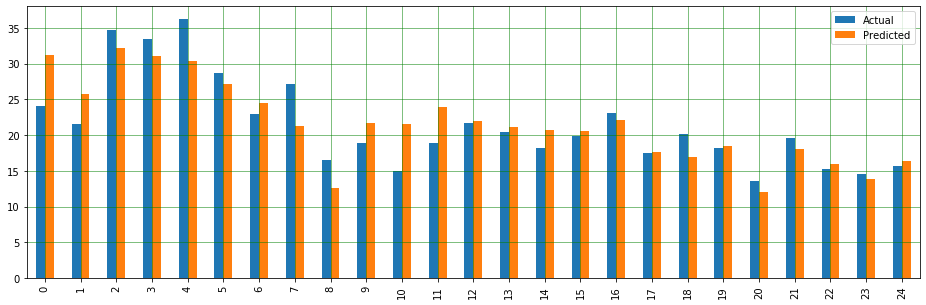

In [40]:
# A rough visual comparison by just taking 25 sample of predictions and actual MEDV
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

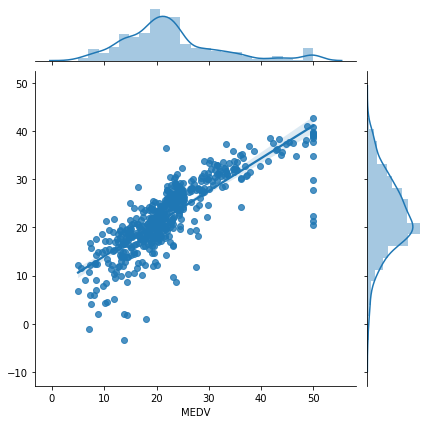

In [79]:
sns.jointplot(y, y_pred, kind='reg');

In [80]:
from sklearn import metrics
# This mean squared error, not root squared error
print(metrics.mean_squared_error(y, y_pred))
print(lr.score(X, y))

27.128774315553887
0.6786434855761494


### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [82]:
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
y_pred = lr1.predict(X_test)

In [59]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
281,35.4,33.732676
273,35.2,31.963537
251,24.8,27.963918
329,22.6,27.181641
40,34.9,32.208549
...,...,...
348,24.5,29.200881
340,18.7,21.088326
401,7.2,16.116366
495,23.1,15.619679


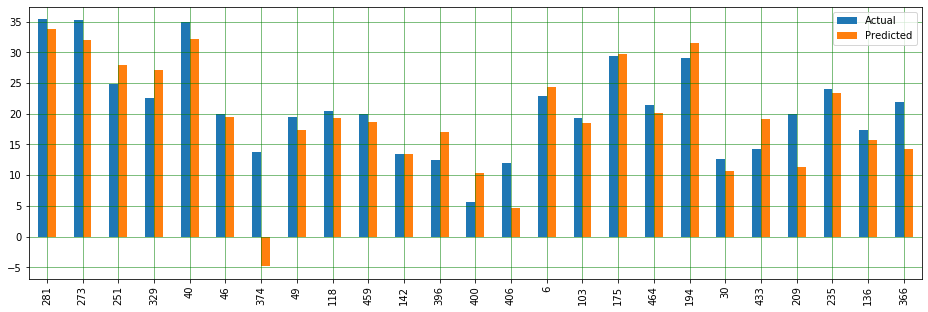

In [46]:
# A rough visual comparison by just taking 25 sample of predictions and actual MEDV
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

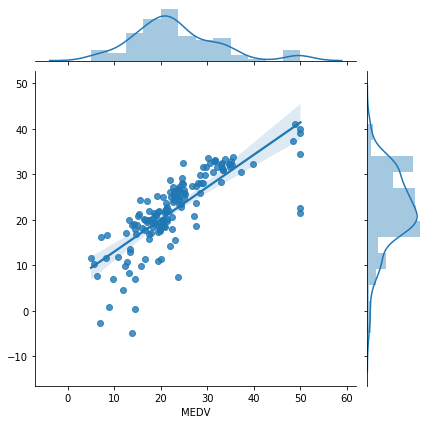

In [84]:
sns.jointplot(y_test, y_pred, kind='reg');

In [85]:
print(metrics.mean_squared_error(y_train, lr1.predict(X_train)))
print(lr1.score(X_train, y_train))
print(metrics.mean_squared_error(y_test, y_pred))
print(lr1.score(X_test, y_test))

24.797167416740145
0.7053991244099634
33.34935661819496
0.6061115808094084


In [86]:
# Now let us try 90/10 train/test/splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=99)
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
y_pred = lr2.predict(X_test)
print(metrics.mean_squared_error(y_train, lr2.predict(X_train)))
print(lr1.score(X_train, y_train))
print(metrics.mean_squared_error(y_test, y_pred))
print(lr1.score(X_test, y_test))

27.750713774178976
0.6758099966173016
22.029857783641866
0.6749277982200658


In [64]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
281,35.4,33.573430
273,35.2,32.344200
251,24.8,27.821831
329,22.6,27.080388
40,34.9,32.161032
46,20.0,19.636921
374,13.8,-4.090632
49,19.4,17.553880
118,20.4,19.505401
459,20.0,18.879791


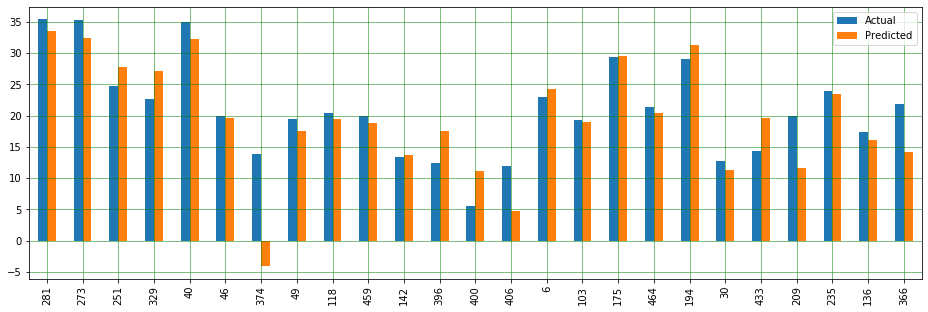

In [65]:
# A rough visual comparison by just taking 25 sample of predictions and actual MEDV
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

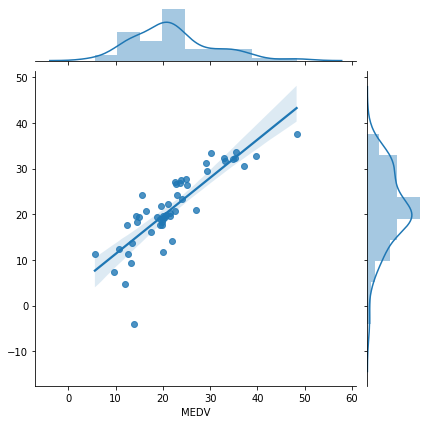

In [87]:
sns.jointplot(y_test, y_pred, kind='reg');

Larger training size (90/10) improves MSE than smaller training size (70/30). More data in training set causing better fit in this case. From the train set metrics we can see that the 70/30 split do well with train set score because it's got less data points and risk of overfitting. So the predicted score is not that good compared to trainset. The 90/10 split, on the other hand, have similar trainset score as the whole set case because it is 90% for training, but its predicted score is better than both the whole set training and the 70/30 split predicted score. From this preliminary analysis we there is a need to further explore the optimum split for training, validation, and testing,.

### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [69]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, cross_val_predict

# iterate through folds 5-10
fold_values = list(range(5,11))
CV_R2s = []
CP_R2s = []
for folds in fold_values:
    print('------------------------------------\n')
    print('K: {}'.format(folds))
    model = LinearRegression()
    
    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=folds)
    print("Cross-validated scores: {}".format(scores))
    print("Mean CV R2: {}".format(np.mean(scores)))
    print('Std CV R2: {}'.format(np.std(scores)))
    CV_R2s.append(np.mean(scores))
    # Make cross-validated predictions
    predictions = cross_val_predict(model, X, y, cv=folds)
    
    r2 = metrics.r2_score(y, predictions)
    print("Cross-Predicted R2: {}".format(r2))
    CP_R2s.append(r2)

------------------------------------

K: 5
Cross-validated scores: [ 0.72738696  0.70240317  0.54242767  0.15053352 -0.11775201]
Mean CV R2: 0.4009998623847066
Std CV R2: 0.331424565819888
Cross-Predicted R2: 0.580375472136366
------------------------------------

K: 6
Cross-validated scores: [ 0.71235875  0.70824764  0.50507743  0.71664658 -0.0119341   0.05647687]
Mean CV R2: 0.44781219526866356
Std CV R2: 0.31034194201028154
Cross-Predicted R2: 0.5750588398762186
------------------------------------

K: 7
Cross-validated scores: [ 0.73131524  0.65012358  0.57256464  0.60858099  0.25570083 -0.15213022
  0.27370477]
Mean CV R2: 0.4199799747539243
Std CV R2: 0.28894940347351916
Cross-Predicted R2: 0.5633183505067778
------------------------------------

K: 8
Cross-validated scores: [ 0.75939364  0.61034738  0.67826647  0.61518915  0.70260846 -0.30401301
 -0.81490593  0.28931779]
Mean CV R2: 0.31702549344517394
Std CV R2: 0.5382289740943111
Cross-Predicted R2: 0.6112581320654502
--------

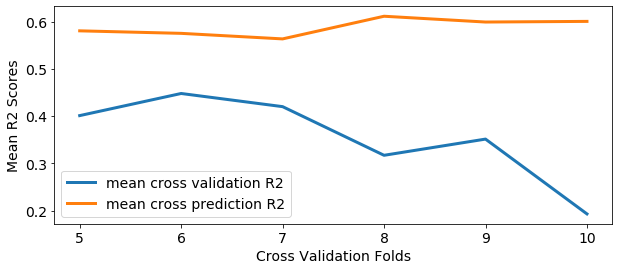

0.6112581320654502
0.44781219526866356


In [96]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(fold_values, CV_R2s, lw=3, label='mean cross validation R2')
ax.plot(fold_values, CP_R2s, lw=3, label='mean cross prediction R2')
ax.legend()
plt.xlabel('Cross Validation Folds')
plt.ylabel('Mean R2 Scores')
plt.show()
print(np.max(CP_R2s))
print(np.max(CV_R2s))

In terms of cross validated prediction, fold=8 is the best with highest mean R2 score of 0.61; In terms of cross validation with rotating training sets, fold=6 seems to produce highest mean R2 score of 0.45. Higher fold than 6 further will cause cross validation with higher fractions of data for training fitting at eny given time, this does not mean though that the training score gets higher. For cross validated predition, it seems have optimum value at fold=8 in this case.

# KNN Practice

In [90]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [92]:
print(iris.head())

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [95]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

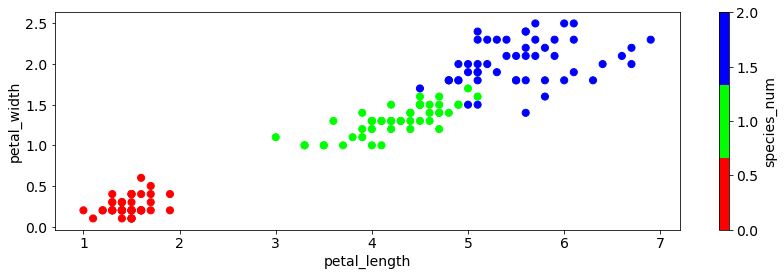

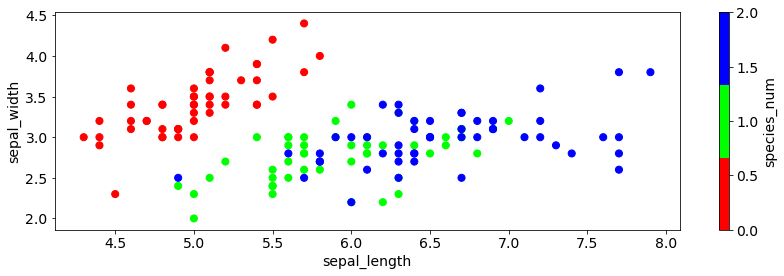

In [123]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
fig, ax = plt.subplots(figsize=(14,4))
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num',s=50,colormap=cmap_bold,ax=ax);
# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
fig, ax = plt.subplots(figsize=(14,4))
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num',s=50,colormap=cmap_bold,ax=ax);

In [124]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


## KNN Classification of the Iris Dataset

### Create your feature matrix "X"
This will be all species measurements (sepal length, petal width, etc...)

In [127]:
X=iris.drop(['species', 'species_num'], axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Create your target vector "y"
This will be the species type.

In [129]:
y = iris.species_num
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species_num, dtype: int64

### Make Use of Train-Test-Split
Split your data in to train and test sets.

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


### Import KNN From `scikit-learn` and Instatiate a Model With One Neighbor

In [135]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

### Check the Accuracy
Train your model using the training set then use the test set to determine the accuracy

In [137]:
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9333333333333333


### Create a Model With Five Neighbors. Did it Improve?

In [138]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9333333333333333


From the results it seems that there is no improvement when n_neighbors increased from 1 to 5

### Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

In [141]:
# We are looking at the accuracy of our data by varying n_neighbors value to see trends
scores = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    score = float(sum(pred == y_test)) / len(y_test)
    scores.append([k, score])

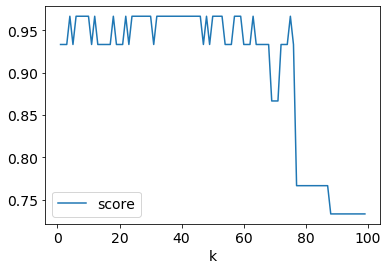

In [143]:
# as K increases to above 70, the number of outliers drops, the variance drops. Otherwise it flucturates around 95%
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

### Bonus: According to `scikit-learn` Documentation, What is `knn.predict_proba(X_new)` Going to Do?

In [144]:
# Each row sums to one and contains the probabilities of the point being a 0-Center, 1-Front, 2-Guard.
# Example in this case. The documentation is in next cell
knn.predict_proba(X_test)

array([[0.21212121, 0.38383838, 0.4040404 ],
       [0.42424242, 0.38383838, 0.19191919],
       [0.21212121, 0.38383838, 0.4040404 ],
       [0.21212121, 0.38383838, 0.4040404 ],
       [0.42424242, 0.38383838, 0.19191919],
       [0.26262626, 0.38383838, 0.35353535],
       [0.21212121, 0.38383838, 0.4040404 ],
       [0.21212121, 0.38383838, 0.4040404 ],
       [0.42424242, 0.38383838, 0.19191919],
       [0.21212121, 0.38383838, 0.4040404 ],
       [0.21212121, 0.38383838, 0.4040404 ],
       [0.21212121, 0.38383838, 0.4040404 ],
       [0.21212121, 0.38383838, 0.4040404 ],
       [0.24242424, 0.38383838, 0.37373737],
       [0.21212121, 0.38383838, 0.4040404 ],
       [0.42424242, 0.38383838, 0.19191919],
       [0.42424242, 0.38383838, 0.19191919],
       [0.24242424, 0.38383838, 0.37373737],
       [0.34343434, 0.38383838, 0.27272727],
       [0.23232323, 0.38383838, 0.38383838],
       [0.22222222, 0.38383838, 0.39393939],
       [0.21212121, 0.38383838, 0.4040404 ],
       [0.

## Scikit-learn Interface

Scikit-learn strives to have a uniform interface across all methods. Given a scikit-learn *estimator*
object named `model`, the following methods are available (not all for each model):

- Available in **supervised estimators**
  
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
    
- Available in **unsupervised estimators**
  
  + `model.predict_proba()` : Gaussian mixture models (GMMs) provide the probability for each point to be generated by a given mixture component.
  

## Enrichment
_Everything beyond this point is enrichment and examples using Statsmodels for linear regression._

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [147]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [148]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1221.
Date:                Sat, 23 May 2020   Prob (F-statistic):                   1.38e-321
Time:                        20:02:11   Log-Likelihood:                         -1567.5
No. Observations:                 506   AIC:                                      3151.
Df Residuals:                     498   BIC:                                      3185.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9729      0.224     22.195      0.000       4.533       5.413
LSTAT         -0.5606      0.048    -11.795      0.000      -0.654      -0.467
RAD            0.2128      0.070      3.050      0.002       0.076       0.350
TAX           -0.0174      0.004     -4.272      0.000      -0.025      -0.009
NOX            4.3448      3.384      1.284      0.200      -2.304      10.994
INDUS          0.0924      0.067      1.383      0.167      -0.039       0.224
CRIM          -0.0891      0.037     -2.423      0.016      -0.161      -0.017
ZN             0.0288      0.013      2.220      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.139   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              832.155
Skew:                           1.666   Prob(JB):                    1.99e-181
Kurtosis:                       8.326   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

In [153]:
X = df.drop(['MEDV'], axis=1)
y = df.MEDV
#print(X.head(), y.head())
# according to the actual columns in X, spit out all the combination of features for evaluations
from itertools import combinations
combs = []
for i in range(1, len(X.columns)+1):
    for c in combinations(X.columns.tolist(), i):
        combs.append(c)
combs

[('CRIM',),
 ('ZN',),
 ('INDUS',),
 ('CHAS',),
 ('NOX',),
 ('RM',),
 ('AGE',),
 ('DIS',),
 ('RAD',),
 ('TAX',),
 ('PTRATIO',),
 ('B',),
 ('LSTAT',),
 ('CRIM', 'ZN'),
 ('CRIM', 'INDUS'),
 ('CRIM', 'CHAS'),
 ('CRIM', 'NOX'),
 ('CRIM', 'RM'),
 ('CRIM', 'AGE'),
 ('CRIM', 'DIS'),
 ('CRIM', 'RAD'),
 ('CRIM', 'TAX'),
 ('CRIM', 'PTRATIO'),
 ('CRIM', 'B'),
 ('CRIM', 'LSTAT'),
 ('ZN', 'INDUS'),
 ('ZN', 'CHAS'),
 ('ZN', 'NOX'),
 ('ZN', 'RM'),
 ('ZN', 'AGE'),
 ('ZN', 'DIS'),
 ('ZN', 'RAD'),
 ('ZN', 'TAX'),
 ('ZN', 'PTRATIO'),
 ('ZN', 'B'),
 ('ZN', 'LSTAT'),
 ('INDUS', 'CHAS'),
 ('INDUS', 'NOX'),
 ('INDUS', 'RM'),
 ('INDUS', 'AGE'),
 ('INDUS', 'DIS'),
 ('INDUS', 'RAD'),
 ('INDUS', 'TAX'),
 ('INDUS', 'PTRATIO'),
 ('INDUS', 'B'),
 ('INDUS', 'LSTAT'),
 ('CHAS', 'NOX'),
 ('CHAS', 'RM'),
 ('CHAS', 'AGE'),
 ('CHAS', 'DIS'),
 ('CHAS', 'RAD'),
 ('CHAS', 'TAX'),
 ('CHAS', 'PTRATIO'),
 ('CHAS', 'B'),
 ('CHAS', 'LSTAT'),
 ('NOX', 'RM'),
 ('NOX', 'AGE'),
 ('NOX', 'DIS'),
 ('NOX', 'RAD'),
 ('NOX', 'TAX'),
 ('NO

In [154]:
# For all the feature combinations and selected number of evenly spaced rows, 
# calculated CV mean R2 score and put in R2_results list
linreg = LinearRegression()
R2_results = {}
for i,c in enumerate(combs):
    if (i % 250) == 0:
        print(i)
    subX = X[list(c)]
    R2_results[c] = np.mean(cross_val_score(linreg, subX, y))

0
250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750
5000
5250
5500
5750
6000
6250
6500
6750
7000
7250
7500
7750
8000


In [155]:
# sort the list and return the highest R2 scores first and lower scores, print the top 5 scores
results = R2_results.items()
results = sorted(results, key=lambda x: x[1], reverse=True)
for i in range(5):
    print(results[i])

(('CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'), 0.5052751616354458)
(('CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'), 0.5046498339504822)
(('CRIM', 'ZN', 'CHAS', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'), 0.5042051050366247)
(('CRIM', 'ZN', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'), 0.5029314837237997)
(('CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'), 0.4948565952409014)


### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

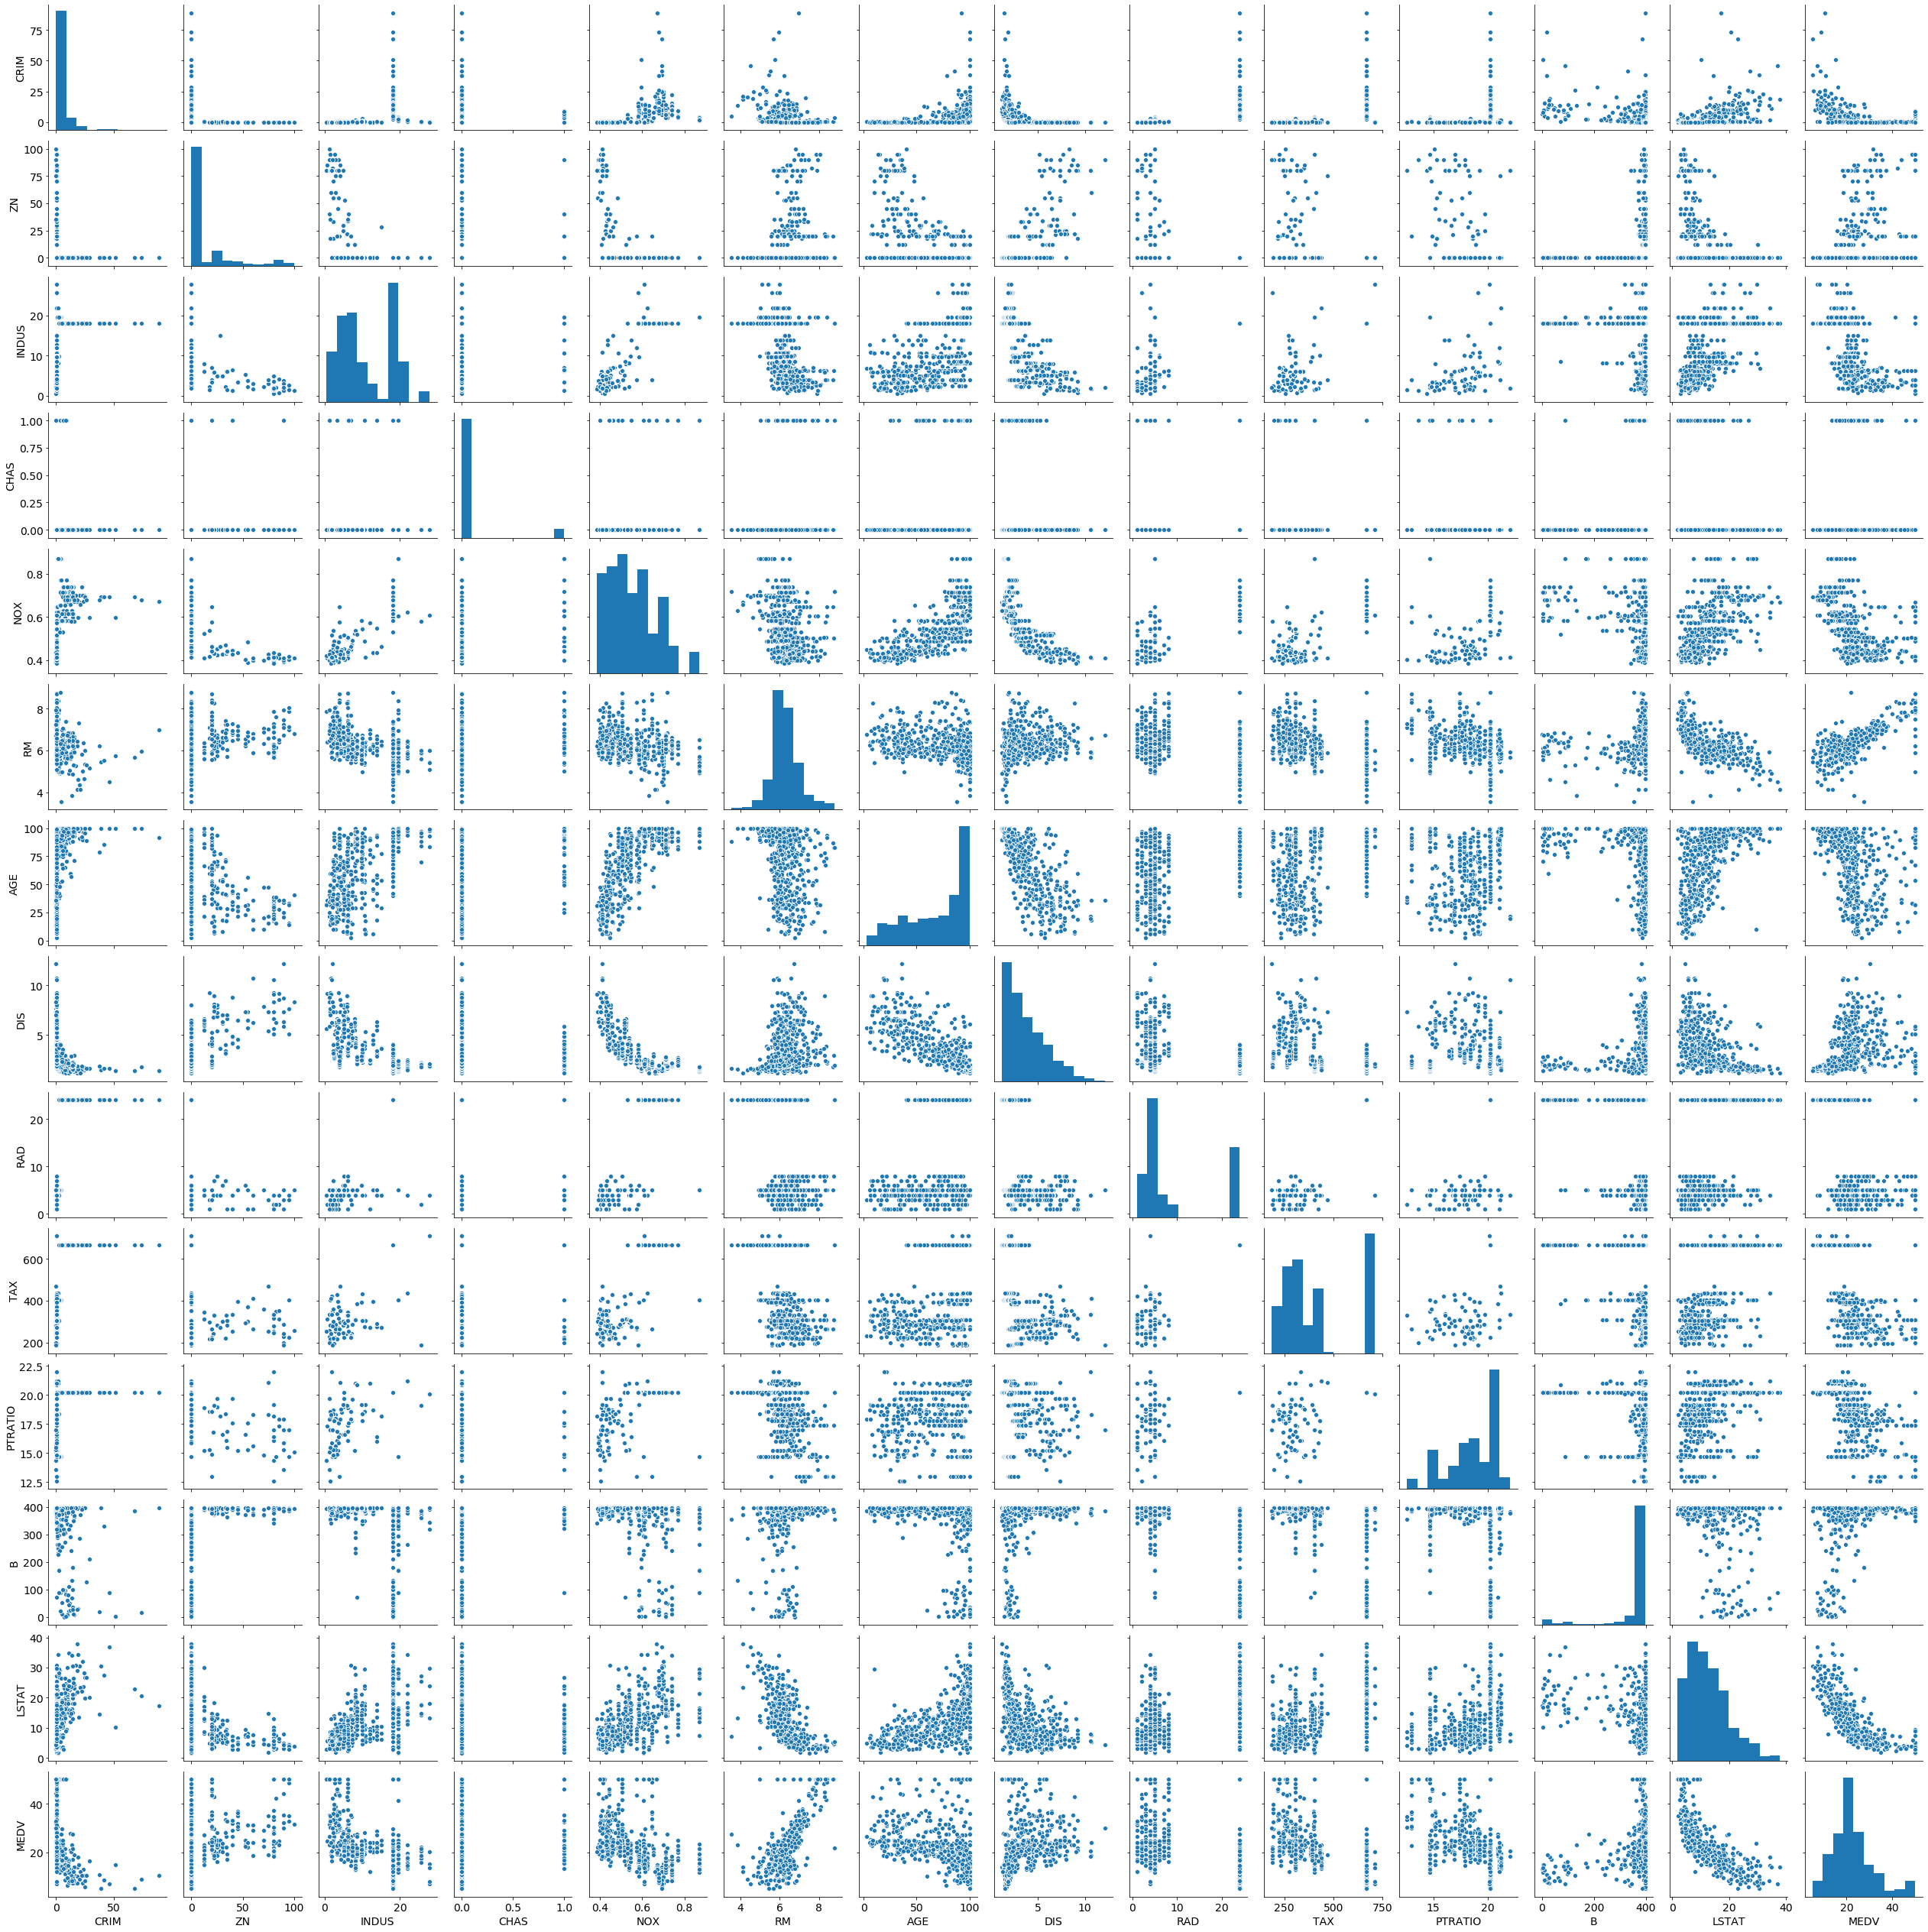

In [158]:
# Check out variable relations
import seaborn as sns

sns.pairplot(df);

The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score.The use of mean and standard deviation in the calculation suggests the need for the two data samples to have a Gaussian or Gaussian-like distribution. The result of the calculation, the correlation coefficient can be interpreted to understand the relationship. The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

In [159]:
# Check out Pearson scores
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [161]:
# Let us preidct crime rate from some features who correlated well with it
import patsy
# Here I pick RAD and TAX because they correlate well with CRIM. Good access to highway maybe good for police to come
y, X = patsy.dmatrices("CRIM ~ RAD + TAX", data=df, return_type="dataframe")
# "unravel" y
y = y.values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=99)

In [162]:
# Build a new model and calculate the score:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.44891974115259703


In [163]:
# Let us preidct how many rooms from some features who correlated well with it
import patsy
# Here I pick LSTAT and MEDV because they correlate well with RM, obviously price and % lower status are features impacting
y, X = patsy.dmatrices("RM ~ LSTAT + MEDV", data=df, return_type="dataframe")
# "unravel" y
y = y.values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=99)

In [164]:
# Build a new model and calculate the score: This time the score is decent! so RM can be pretty well predicted by LSTAT & MEDV
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.5351381182372835


## Demo: Patsy

In [11]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [12]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [13]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.5043486813354807
